In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
%matplotlib inline

In [3]:
# replacing string in to binary
df = pd.read_csv('cleaned_data.csv')
df['change_in_meds'] = df['change_in_meds'].replace('Ch', 1)
df['change_in_meds'] = df['change_in_meds'].replace('No', 0)

In [4]:
df['citoglipton'].value_counts()

not_prescribed    99492
Name: citoglipton, dtype: int64

In [5]:
df['examide'].value_counts()

not_prescribed    99492
Name: examide, dtype: int64

In [6]:
to_drop = ['citoglipton','examide']

df.drop(to_drop, inplace=True, axis=1)

In [7]:
# replacing string in to binary
df['diabates_med_prescribed'] = df['diabates_med_prescribed'].replace('No', 0)
df['diabates_med_prescribed'] = df['diabates_med_prescribed'].replace('Yes', 1)
df['gender'] = df['gender'].replace('Male', 0)
df['gender'] = df['gender'].replace('Female', 1)

#replace age code intervals 0- 10: 1, 10-20:2 etc
for i in range (0,10):
    df['age']=df['age'].replace('['+str(10*i)+ '-' +str(10*(i+1))+')', i+1)
df.head(3)

,Unnamed: 0,race,gender,age,days_in_hospital,num_lab_procedures,num_not_lab_procedures,num_current_medications,num_outpatient_appointments,num_previous_emergencies,...,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change_in_meds,diabates_med_prescribed,readmitted
0,0,Caucasian,1,1,1,41,0,1,0,0,...,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,0,0,NO
1,1,Caucasian,1,2,3,59,0,18,0,0,...,not_prescribed,dosage_increased,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,1,1,>30
2,2,AfricanAmerican,1,3,2,11,5,13,2,0,...,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,not_prescribed,0,1,NO


In [8]:
meds = ['metformin', 'nateglinide', 'chlorpropamide', 'glimepiride',
        'acetohexamide', 'glipizide','repaglinide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
        'acarbose', 'miglitol', 'troglitazone','tolazamide','insulin',  'glyburide_metformin',
        'glipizide_metformin', 'glimepiride_pioglitazone', 
        'metformin_rosiglitazone', 'metformin_pioglitazone']

for col in meds:
    df[col]=df[col].replace('not_prescribed', 0)
    df[col]=df[col].replace('no_change_dosage', 0)
    df[col]=df[col].replace('dosage_increased', 1)
    df[col]=df[col].replace('dosage_decreased', 1)

In [9]:
column_names1 =['race']
new_values = {'AfricanAmerican': 0, 'Asian':1, 'Caucasian': 3, 'Hispanic': 4, 'Other': 5 }
for medicine in column_names1:
    df[medicine] = df[medicine].replace(new_values)

In [75]:

# train test split
from sklearn.model_selection import train_test_split
X = df.drop('readmitted', axis = 1)
y = df.readmitted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [76]:
#size of x train
len(X_train)

79593

In [78]:
# builds multiple decision trees to get final outcome. We used 300 decision trees 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 300)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
#accuracy of model
rfc.score(X_test,y_test)

0.5754560530679934

In [55]:
rfc_pred= rfc.predict(X_test)

In [33]:
#confusion matrix to vizualize performance of the algorithm
from sklearn.metrics import confusion_matrix

In [86]:
#summary of predicioton results
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[  50  907 1279]
 [  63 2778 4214]
 [  37 2073 8498]]


              precision    recall  f1-score   support

         <30       0.33      0.02      0.04      2236
         >30       0.48      0.39      0.43      7055
          NO       0.61      0.80      0.69     10608

    accuracy                           0.57     19899
   macro avg       0.47      0.41      0.39     19899
weighted avg       0.53      0.57      0.53     19899



Text(69.0, 0.5, 'Truth')

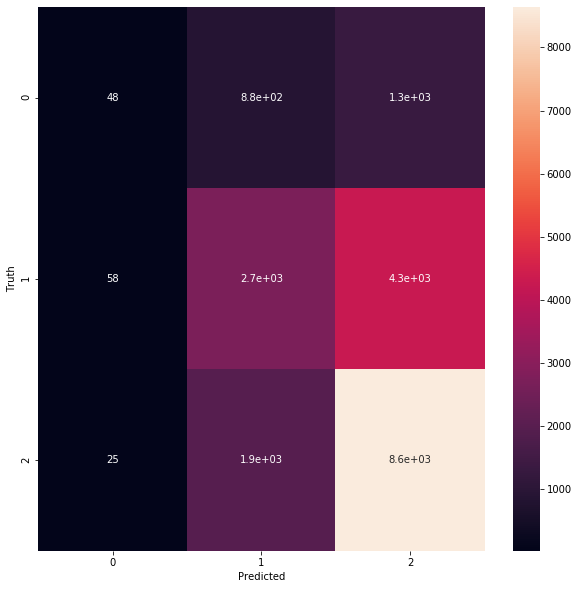

In [49]:
#plot visually
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# The model predicted 48 times 0 and truth was 0, model predicted 25 times 0, but truth was 2  )